# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 588


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(city_url)).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kurumkan
Processing Record 2 of Set 1 | qal'at bishah
City not found. Skipping...
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | prado
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | petropavlovsk-kamchatsky
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | elko
Processing Record 9 of Set 1 | hudiksvall
Processing Record 10 of Set 1 | lihue
Processing Record 11 of Set 1 | meadow lake
Processing Record 12 of Set 1 | al fuwayliq
Processing Record 13 of Set 1 | korla
Processing Record 14 of Set 1 | anadyr
Processing Record 15 of Set 1 | blackwell
Processing Record 16 of Set 1 | margaret river
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | olonkinbyen
Processing Record 19 of Set 1 | puerto natales
Processing Record 20 of Set 1 | murray bridge
Processing Record 21 of Set 1 | grytviken
Processing Re

Processing Record 36 of Set 4 | weno
Processing Record 37 of Set 4 | stanley
Processing Record 38 of Set 4 | cockburn town
Processing Record 39 of Set 4 | shimoda
Processing Record 40 of Set 4 | yarrawonga
Processing Record 41 of Set 4 | san pedro pochutla
Processing Record 42 of Set 4 | i-n-salah
Processing Record 43 of Set 4 | uturoa
Processing Record 44 of Set 4 | qandala
Processing Record 45 of Set 4 | kodiak
Processing Record 46 of Set 4 | darhan
Processing Record 47 of Set 4 | cidreira
Processing Record 48 of Set 4 | rawson
Processing Record 49 of Set 4 | bata
Processing Record 0 of Set 5 | tufesti
Processing Record 1 of Set 5 | hammerfest
Processing Record 2 of Set 5 | bueng kan
Processing Record 3 of Set 5 | teykovo
Processing Record 4 of Set 5 | gebeit
Processing Record 5 of Set 5 | finspang
Processing Record 6 of Set 5 | ulety
Processing Record 7 of Set 5 | port mathurin
Processing Record 8 of Set 5 | lakatoro
Processing Record 9 of Set 5 | antsiranana
Processing Record 10 of

Processing Record 28 of Set 8 | kashgar
Processing Record 29 of Set 8 | saint-pierre
Processing Record 30 of Set 8 | nagqu
Processing Record 31 of Set 8 | chilecito
Processing Record 32 of Set 8 | kayakent
Processing Record 33 of Set 8 | ataq
Processing Record 34 of Set 8 | vingt cinq
City not found. Skipping...
Processing Record 35 of Set 8 | upper grand lagoon
Processing Record 36 of Set 8 | bathsheba
Processing Record 37 of Set 8 | vryburg
Processing Record 38 of Set 8 | xiongzhou
Processing Record 39 of Set 8 | jashpurnagar
Processing Record 40 of Set 8 | tazovsky
Processing Record 41 of Set 8 | zhaotong
Processing Record 42 of Set 8 | murwillumbah
Processing Record 43 of Set 8 | kalifornsky
Processing Record 44 of Set 8 | yuzhno-sakhalinsk
Processing Record 45 of Set 8 | fort bragg
Processing Record 46 of Set 8 | bang yai
Processing Record 47 of Set 8 | acajutla
Processing Record 48 of Set 8 | andkhoy
Processing Record 49 of Set 8 | mokhsogollokh
Processing Record 0 of Set 9 | por

Processing Record 18 of Set 12 | zaozersk
Processing Record 19 of Set 12 | as sulayyil
Processing Record 20 of Set 12 | laurentides
Processing Record 21 of Set 12 | mirny
Processing Record 22 of Set 12 | luderitz
Processing Record 23 of Set 12 | glace bay
Processing Record 24 of Set 12 | stung treng
Processing Record 25 of Set 12 | ostersund
Processing Record 26 of Set 12 | san luis de la loma
Processing Record 27 of Set 12 | turpan
Processing Record 28 of Set 12 | kamloops
Processing Record 29 of Set 12 | kudahuvadhoo
Processing Record 30 of Set 12 | chibougamau
Processing Record 31 of Set 12 | smithers
Processing Record 32 of Set 12 | mariehamn
Processing Record 33 of Set 12 | mawlamyinegyunn
Processing Record 34 of Set 12 | nelson bay
Processing Record 35 of Set 12 | kayenta
Processing Record 36 of Set 12 | seymour
Processing Record 37 of Set 12 | thanh hoa
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
#city_data_df

# Show Record Count
city_data_df.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kurumkan,54.3000,110.3000,12.68,65,100,1.40,RU,1686609593
1,port-aux-francais,-49.3500,70.2167,6.31,91,100,14.08,TF,1686609593
2,prado,-17.3411,-39.2208,22.95,82,0,3.50,BR,1686609593
3,albany,42.6001,-73.9662,25.51,55,100,1.34,US,1686609594
4,petropavlovsk-kamchatsky,53.0452,158.6483,18.21,48,0,3.00,RU,1686609594


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kurumkan,54.3000,110.3000,12.68,65,100,1.40,RU,1686609593
1,port-aux-francais,-49.3500,70.2167,6.31,91,100,14.08,TF,1686609593
2,prado,-17.3411,-39.2208,22.95,82,0,3.50,BR,1686609593
3,albany,42.6001,-73.9662,25.51,55,100,1.34,US,1686609594
4,petropavlovsk-kamchatsky,53.0452,158.6483,18.21,48,0,3.00,RU,1686609594


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

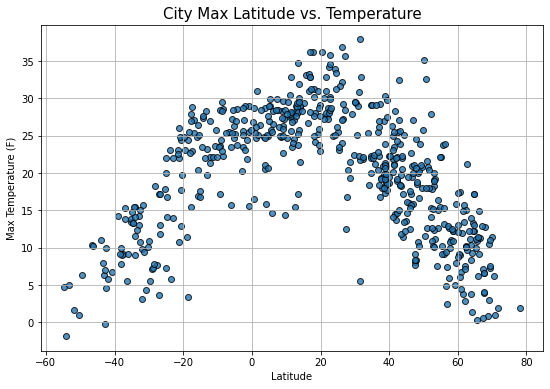

In [8]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(9,6))
plt.scatter(city_data_df["Lat"], 
            city_data_df["Max Temp"], 
            marker="o",
            edgecolor="black", 
            linewidth=1,
            alpha=0.8,
            label="Cities")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature", fontsize=15)
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

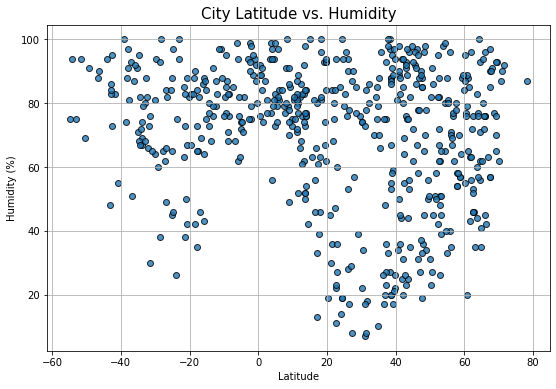

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(9,6))
plt.scatter(city_data_df["Lat"], 
            city_data_df["Humidity"], 
            marker="o",
            edgecolor="black", 
            linewidth=1,
            alpha=0.8,
            label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity", fontsize=15)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

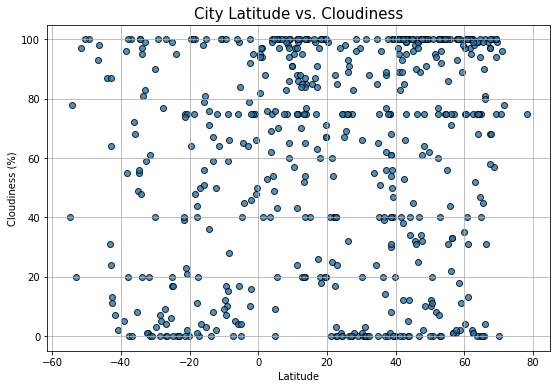

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(9,6))
plt.scatter(city_data_df["Lat"], 
            city_data_df["Cloudiness"], 
            marker="o",
            edgecolor="black", 
            linewidth=1,
            alpha=0.8,
            label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness", fontsize=15)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

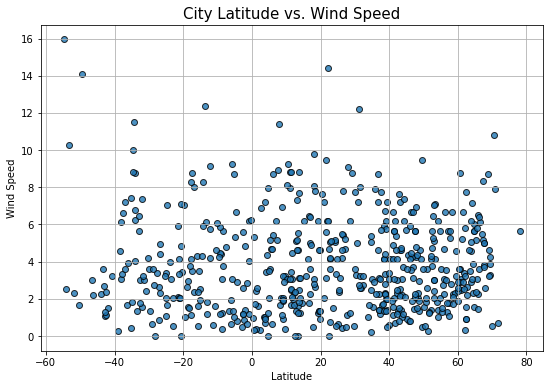

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(9,6))
plt.scatter(city_data_df["Lat"], 
            city_data_df["Wind Speed"], 
            marker="o",
            edgecolor="black", 
            linewidths=1,
            alpha=0.8,
            label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed", fontsize=15)
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kurumkan,54.3000,110.3000,12.68,65,100,1.40,RU,1686609593
3,albany,42.6001,-73.9662,25.51,55,100,1.34,US,1686609594
4,petropavlovsk-kamchatsky,53.0452,158.6483,18.21,48,0,3.00,RU,1686609594
6,elko,41.0002,-115.5012,20.13,50,89,4.92,US,1686609594
7,hudiksvall,61.7290,17.1036,15.75,43,97,3.38,SE,1686609594


In [13]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,6.31,91,100,14.08,TF,1686609593
2,prado,-17.3411,-39.2208,22.95,82,0,3.50,BR,1686609593
5,adamstown,-25.0660,-130.1015,20.04,65,17,3.40,PN,1686609594
14,margaret river,-33.9500,115.0667,15.48,69,95,6.76,AU,1686609262
17,puerto natales,-51.7236,-72.4875,1.69,94,97,2.30,CL,1686609595


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7590204609729708


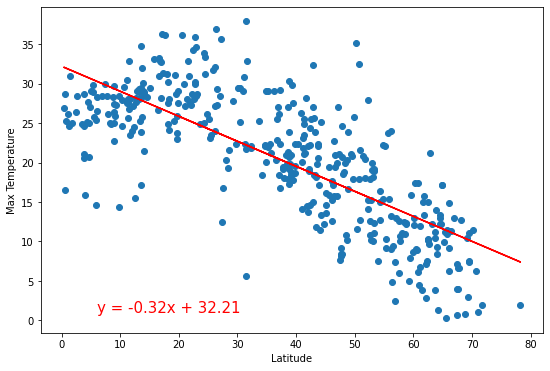

In [14]:
# Linear regression on Northern Hemisphere
plt.figure(figsize=(9,6))
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,1),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

print(f"The r-value is: {rvalue}")

plt.show()

The r-value is: 0.8201217110995362


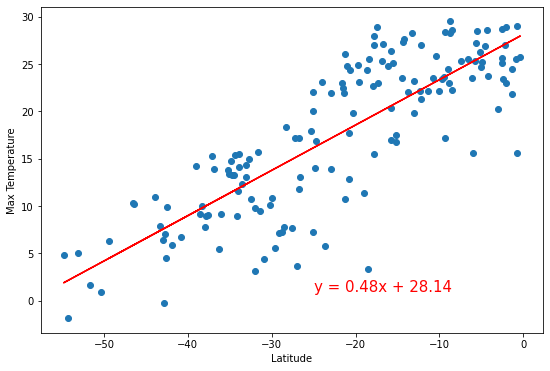

In [15]:
# Linear regression on Southern Hemisphere
plt.figure(figsize=(9,6))
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,1),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

print(f"The r-value is: {rvalue}")

plt.show()

**Discussion about the linear relationship:** In the Northern hemisphere there is a negative correlation between latitude and maximum temperature, while in the Southern hemisphere there is a positive correlation. From this we can see that if a city is located away of the equator the temperature decreases, while if it is closer to the equator it increases.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.09382459681027024


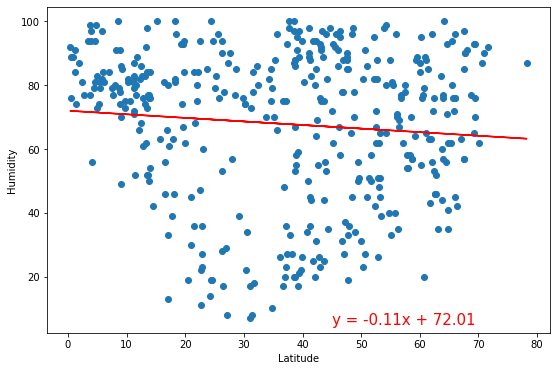

In [16]:
# Northern Hemisphere
plt.figure(figsize=(9,6))
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (45,5), fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

print(f"The r-value is: {rvalue}")

plt.show()

The r-value is: 0.05851776278970149


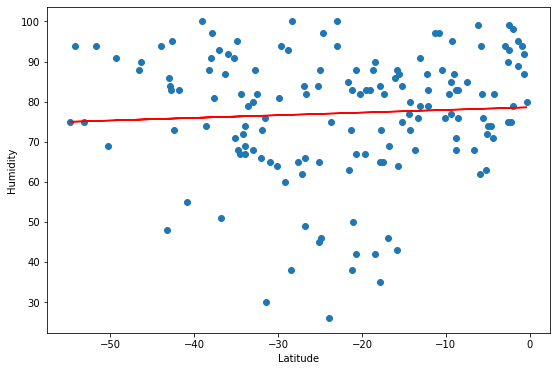

In [17]:
# Southern Hemisphere
plt.figure(figsize=(9,6))
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

print(f"The r-value is: {rvalue}")

plt.show()

**Discussion about the linear relationship:** From the r-value and the graphs we can deduct that there is no correlation between the humidity levels and the location of the city from the equator.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.04210589847277932


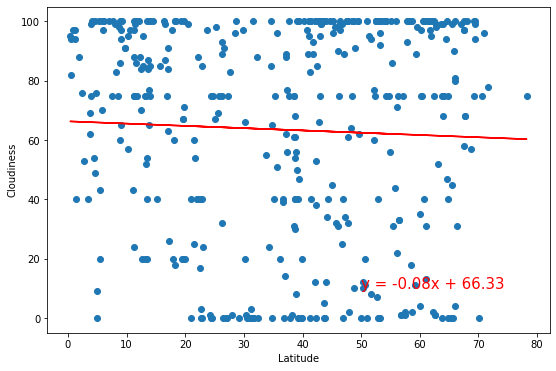

In [18]:
# Northern Hemisphere
plt.figure(figsize=(9,6))
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (50,10), fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

print(f"The r-value is: {rvalue}")

plt.show()

The r-value is: -0.025950718907240298


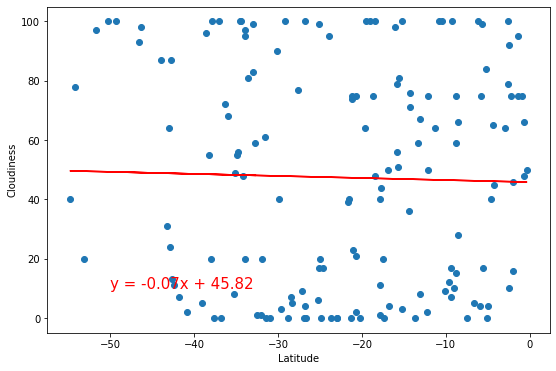

In [19]:
# Southern Hemisphere
plt.figure(figsize=(9,6))
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

print(f"The r-value is: {rvalue}")

plt.show()

**Discussion about the linear relationship:** With a small r-value and the graphs we can see that there is no correlation between the cloudiness and the position of the city related to the equator. The cloudiness points are spread across the graph.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0147491291719368


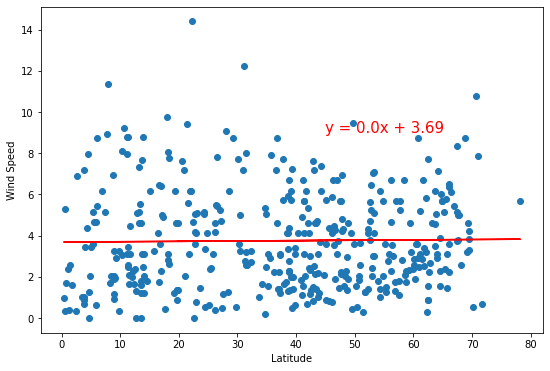

In [20]:
# Northern Hemisphere
plt.figure(figsize=(9,6))
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (45,9), fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

print(f"The r-value is: {rvalue}")

plt.show()

The r-value is: -0.1387329717614968


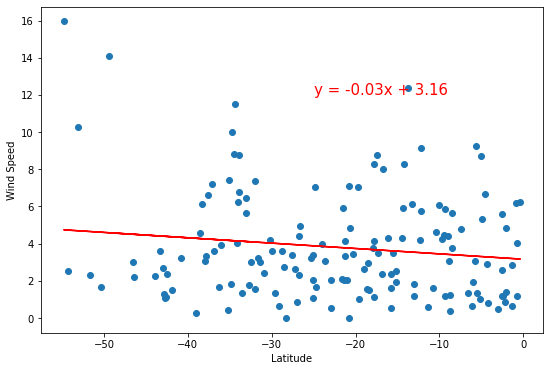

In [21]:
# Southern Hemisphere
plt.figure(figsize=(9,6))
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,12),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

print(f"The r-value is: {rvalue}")

plt.show()

**Discussion about the linear relationship:** The correlation between the wind speed and a latitude on both the Northern and Southern Hemispheres is low. When the city moves away from the equator the wind speed lighlty increases.